In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics


In [2]:
churn = pd.read_csv("C:/Users/ANKIT/Desktop/Desktop/Globsyn/Project/churn_train.csv")

In [3]:
churn.shape

(3333, 21)

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   st          3333 non-null   object 
 1   acclen      3333 non-null   int64  
 2   arcode      3333 non-null   int64  
 3   phnum       3333 non-null   object 
 4   intplan     3333 non-null   object 
 5   voice       3333 non-null   object 
 6   nummailmes  3333 non-null   int64  
 7   tdmin       3333 non-null   float64
 8   tdcal       3333 non-null   int64  
 9   tdchar      3333 non-null   float64
 10  temin       3333 non-null   float64
 11  tecal       3333 non-null   int64  
 12  tecahr      3333 non-null   float64
 13  tnmin       3333 non-null   float64
 14  tncal       3333 non-null   int64  
 15  tnchar      3333 non-null   float64
 16  timin       3333 non-null   float64
 17  tical       3333 non-null   int64  
 18  tichar      3333 non-null   float64
 19  ncsc        3333 non-null  

In [5]:
churn.st.unique().shape

(51,)

In [6]:
churn["label"]=(churn["label"] == "True.").astype(np.int)

In [7]:
churn.corr()["label"].sort_values(ascending=False)

label         1.000000
ncsc          0.208750
tdmin         0.205151
tdchar        0.205151
temin         0.092796
tecahr        0.092786
tichar        0.068259
timin         0.068239
tnchar        0.035496
tnmin         0.035493
tdcal         0.018459
acclen        0.016541
tecal         0.009233
arcode        0.006174
tncal         0.006141
tical        -0.052844
nummailmes   -0.089728
Name: label, dtype: float64

In [10]:
churn.drop(["st","phnum","intplan","voice",],axis=1,inplace=True)

In [11]:
churn.shape

(3333, 17)

In [17]:
churn.corr()['label'].sort_values(ascending=False)

label         1.000000
ncsc          0.208750
tdmin         0.205151
tdchar        0.205151
temin         0.092796
tecahr        0.092786
tichar        0.068259
timin         0.068239
tnchar        0.035496
tnmin         0.035493
tdcal         0.018459
acclen        0.016541
tecal         0.009233
arcode        0.006174
tncal         0.006141
tical        -0.052844
nummailmes   -0.089728
Name: label, dtype: float64

In [18]:
churn.drop(["nummailmes","tical","tncal","arcode","tecal","acclen","tdcal","tnmin","timin","tnchar"],axis=1,inplace=True)

In [ ]:
churn

In [19]:
y = churn['label']
X = churn.drop(['label'], axis = 1)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

In [47]:
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
trainp=model.predict(X_train)

testp=model.predict(X_test)

In [49]:
def printresult(actual,predicted):
    accscore=metrics.accuracy_score(actual,predicted)
    precscore=metrics.precision_score(actual,predicted)
    recscore=metrics.recall_score(actual,predicted)
    print("accuracy : {:.4f}".format(accscore))
    print("precision : {:.4f}".format(precscore))
    print("recall : {:.4f}".format(recscore))
    print("f1-score : {:.4f}".format(metrics.f1_score(actual,predicted)))
    print("AUC : {:.4f}".format(metrics.roc_auc_score(actual,predicted)))

In [50]:
printresult(y_train,trainp)

accuracy : 0.8526
precision : 0.4286
recall : 0.0553
f1-score : 0.0980
AUC : 0.5214


In [51]:
printresult(y_test,testp)

accuracy : 0.8593
precision : 0.6667
recall : 0.0816
f1-score : 0.1455
AUC : 0.5373


In [54]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import datasets
from sklearn import tree
from sklearn import metrics
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import feature_selection
from sklearn import ensemble
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
def modelstats1(Xtrain,Xtest,ytrain,ytest):
    stats=[]
    modelnames=["LR","DecisionTree","KNN","NB","RANDOM FOREST"]
    models=list()
    models.append(linear_model.LogisticRegression())
    models.append(tree.DecisionTreeClassifier())
    models.append(neighbors.KNeighborsClassifier())
    models.append(naive_bayes.GaussianNB())
    models.append(ensemble.RandomForestClassifier(n_estimators=100,random_state=42))
    for name,model in zip(modelnames,models):
        if name=="KNN":
            k=[l for l in range(5,17,2)]
            grid={"n_neighbors":k}
            grid_obj = model_selection.GridSearchCV(estimator=model,param_grid=grid,scoring="f1")
            grid_fit =grid_obj.fit(X_train,y_train)
            model = grid_fit.best_estimator_
            model.fit(X_train,y_train)
            name=name+"("+str(grid_fit.best_params_["n_neighbors"])+")"
            print(grid_fit.best_params_)
        else:       
            model.fit(X_train,y_train)
        trainprediction=model.predict(X_train)
        testprediction=model.predict(X_test)
        scores=list()
        scores.append(name+"-train")
        scores.append(metrics.accuracy_score(y_train,trainprediction))
        scores.append(metrics.precision_score(y_train,trainprediction))
        scores.append(metrics.recall_score(y_train,trainprediction))
        scores.append(metrics.roc_auc_score(y_train,trainprediction))
        stats.append(scores)
        scores=list()
        scores.append(name+"-test")
        scores.append(metrics.accuracy_score(y_test,testprediction))
        scores.append(metrics.precision_score(y_test,testprediction))
        scores.append(metrics.recall_score(y_test,testprediction))
        scores.append(metrics.roc_auc_score(y_test,testprediction))
        stats.append(scores)
    
    colnames=["MODELNAME","ACCURACY","PRECISION","RECALL","AUC"]
    return pd.DataFrame(stats,columns=colnames)

In [58]:
modelstats1(X_train,X_test,y_train,y_test)

{'n_neighbors': 5}


,MODELNAME,ACCURACY,PRECISION,RECALL,AUC
0,LR-train,0.852618,0.428571,0.055300,0.521412
1,LR-test,0.859281,0.666667,0.081633,0.537308
2,DecisionTree-train,1.000000,1.000000,1.000000,1.000000
3,DecisionTree-test,0.832335,0.433962,0.469388,0.682062
4,KNN(5)-train,0.891297,0.759615,0.364055,0.672281
5,KNN(5)-test,0.889222,0.750000,0.367347,0.673147
6,NB-train,0.872291,0.597701,0.359447,0.659256
7,NB-test,0.856287,0.516129,0.326531,0.636950
8,RANDOM FOREST-train,1.000000,1.000000,1.000000,1.000000
9,RANDOM FOREST-test,0.898204,0.692308,0.551020,0.754458


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [62]:
churn1 = pd.read_csv("C:/Users/ANKIT/Desktop/Desktop/Globsyn/Project/churn_train.csv")
churn1["label"]=(churn1["label"] == "True.").astype(np.int)
churn1["phnum"]=(churn1["phnum"] == "yes").astype(np.int)
churn1["intplan"]=(churn1["intplan"] == "yes").astype(np.int)
churn1["voice"]=(churn1["voice"] == "yes").astype(np.int)
churn1.drop(["st",],axis=1,inplace=True)
X = churn1.iloc[:,0:20]  #independent columns
y = churn1.iloc[:,-1]
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe colum


print(featureScores.nlargest(7,'Score'))  #print 10 best features

         Specs        Score
19       label  2850.000000
6        tdmin  2314.169315
5   nummailmes   620.628799
8       tdchar   393.399658
9        temin   367.164781
3      intplan   203.244178
18        ncsc   160.773588


In [64]:
y = churn['label']
X = churn.drop(['label'], axis = 1)

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.10, random_state = 0)

In [77]:
def modelstats1(Xtrain,Xtest,ytrain,ytest):
    stats=[]
    modelnames=["LR","DecisionTree","KNN","NB","RANDOM FOREST"]
    models=list()
    models.append(linear_model.LogisticRegression())
    models.append(tree.DecisionTreeClassifier())
    models.append(neighbors.KNeighborsClassifier())
    models.append(naive_bayes.GaussianNB())
    models.append(ensemble.RandomForestClassifier(n_estimators=100,random_state=42))
    for name,model in zip(modelnames,models):
        if name=="KNN":
            k=[l for l in range(5,17,2)]
            grid={"n_neighbors":k}
            grid_obj = model_selection.GridSearchCV(estimator=model,param_grid=grid,scoring="f1")
            grid_fit =grid_obj.fit(Xtrain,ytrain)
            model = grid_fit.best_estimator_
            model.fit(Xtrain,ytrain)
            name=name+"("+str(grid_fit.best_params_["n_neighbors"])+")"
            print(grid_fit.best_params_)
        else:       
            model.fit(Xtrain,ytrain)
        trainprediction=model.predict(Xtrain)
        testprediction=model.predict(Xtest)
        scores=list()
        scores.append(name+"-train")
        scores.append(metrics.accuracy_score(ytrain,trainprediction))
        scores.append(metrics.precision_score(ytrain,trainprediction))
        scores.append(metrics.recall_score(ytrain,trainprediction))
        scores.append(metrics.roc_auc_score(ytrain,trainprediction))
        stats.append(scores)
        scores=list()
        scores.append(name+"-test")
        scores.append(metrics.accuracy_score(ytest,testprediction))
        scores.append(metrics.precision_score(ytest,testprediction))
        scores.append(metrics.recall_score(ytest,testprediction))
        scores.append(metrics.roc_auc_score(ytest,testprediction))
        stats.append(scores)
    
    colnames=["MODELNAME","ACCURACY","PRECISION","RECALL","AUC"]
    return pd.DataFrame(stats,columns=colnames)

In [78]:
modelstats1(X_train,X_test,y_train,y_test)

{'n_neighbors': 9}


,MODELNAME,ACCURACY,PRECISION,RECALL,AUC
0,LR-train,0.816817,0.454545,0.083333,0.530678
1,LR-test,0.860333,0.530303,0.082742,0.535356
2,DecisionTree-train,1.000000,1.000000,1.000000,1.000000
3,DecisionTree-test,0.824333,0.409722,0.557920,0.712992
4,KNN(9)-train,0.858859,0.696970,0.383333,0.673352
5,KNN(9)-test,0.869000,0.553571,0.366430,0.658962
6,NB-train,0.858859,0.638298,0.500000,0.718864
7,NB-test,0.860667,0.506596,0.453901,0.690668
8,RANDOM FOREST-train,1.000000,1.000000,1.000000,1.000000
9,RANDOM FOREST-test,0.893667,0.652047,0.527187,0.740505


In [81]:
churn2 = pd.read_csv("C:/Users/ANKIT/Desktop/Desktop/Globsyn/Project/churn_train.csv")

In [82]:
churn2["label"]=(churn2["label"] == "True.").astype(np.int)
churn2["phnum"]=(churn2["phnum"] == "yes").astype(np.int)
churn2["intplan"]=(churn2["intplan"] == "yes").astype(np.int)
churn2["voice"]=(churn2["voice"] == "yes").astype(np.int)
churn2.drop(["st",],axis=1,inplace=True)

In [83]:
y2 = churn['label']
X2 = churn.drop(['label'], axis = 1)

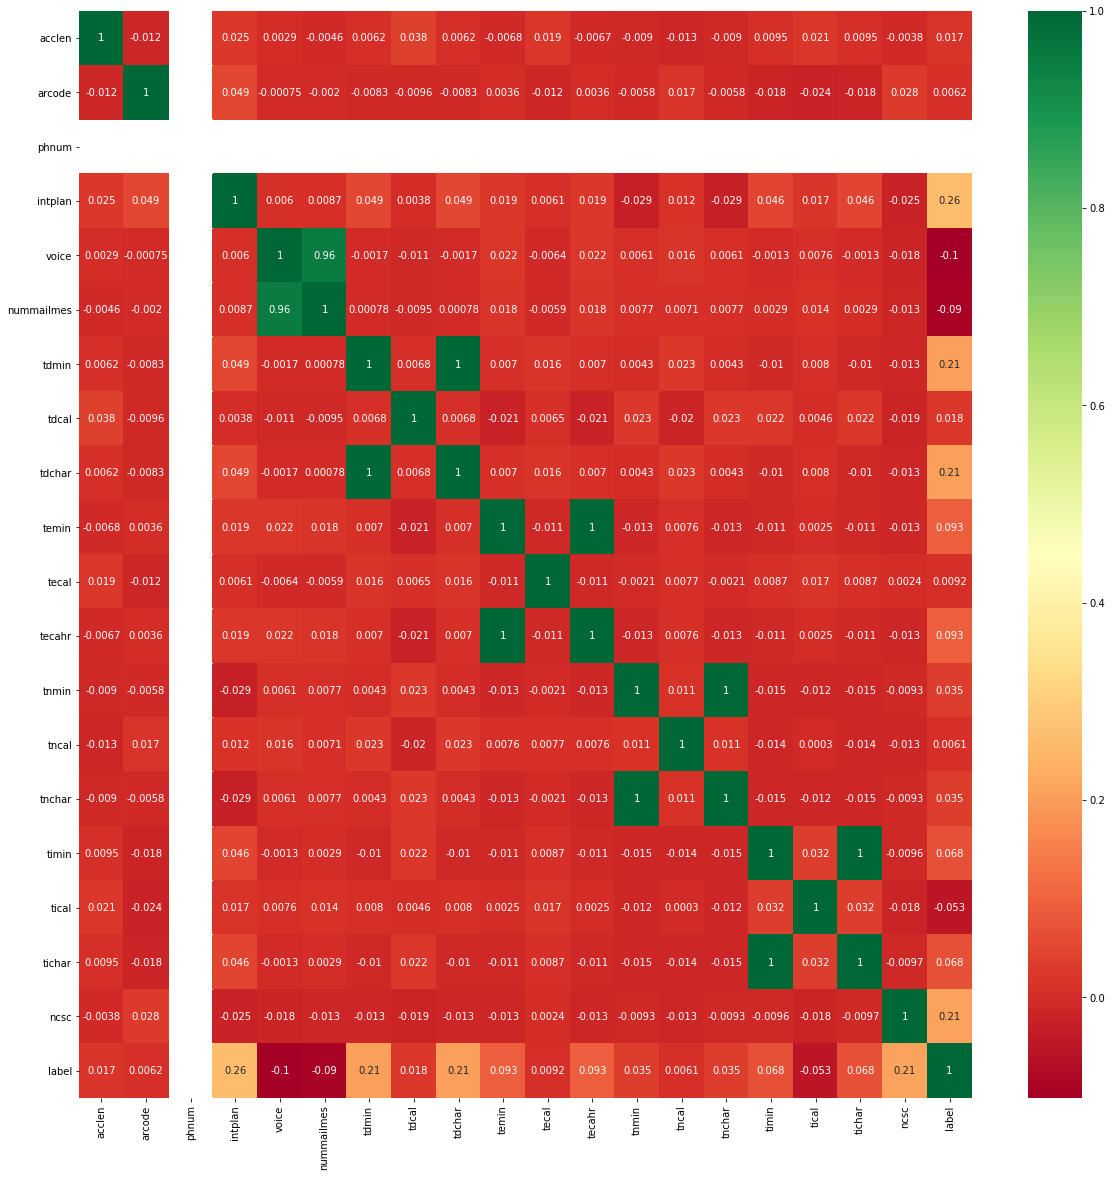

In [93]:

import seaborn as sns
#get correlations of each features in dataset
corrmat = churn2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(churn2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [84]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X2,y2)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

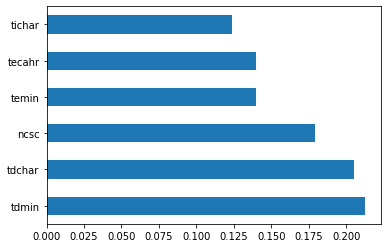

In [86]:
feat_importances = pd.Series(model.feature_importances_, index=X2.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size = 0.70, random_state = 0)

In [89]:
def modelstats1(Xtrain,Xtest,ytrain,ytest):
    stats=[]
    modelnames=["LR","DecisionTree","KNN","NB","RANDOM FOREST"]
    models=list()
    models.append(linear_model.LogisticRegression())
    models.append(tree.DecisionTreeClassifier())
    models.append(neighbors.KNeighborsClassifier())
    models.append(naive_bayes.GaussianNB())
    models.append(ensemble.RandomForestClassifier(n_estimators=100,random_state=42))
    for name,model in zip(modelnames,models):
        if name=="KNN":
            k=[l for l in range(5,17,2)]
            grid={"n_neighbors":k}
            grid_obj = model_selection.GridSearchCV(estimator=model,param_grid=grid,scoring="f1")
            grid_fit =grid_obj.fit(Xtrain,ytrain)
            model = grid_fit.best_estimator_
            model.fit(Xtrain,ytrain)
            name=name+"("+str(grid_fit.best_params_["n_neighbors"])+")"
            print(grid_fit.best_params_)
        else:       
            model.fit(Xtrain,ytrain)
        trainprediction=model.predict(Xtrain)
        testprediction=model.predict(Xtest)
        scores=list()
        scores.append(name+"-train")
        scores.append(metrics.accuracy_score(ytrain,trainprediction))
        scores.append(metrics.precision_score(ytrain,trainprediction))
        scores.append(metrics.recall_score(ytrain,trainprediction))
        scores.append(metrics.roc_auc_score(ytrain,trainprediction))
        stats.append(scores)
        scores=list()
        scores.append(name+"-test")
        scores.append(metrics.accuracy_score(ytest,testprediction))
        scores.append(metrics.precision_score(ytest,testprediction))
        scores.append(metrics.recall_score(ytest,testprediction))
        scores.append(metrics.roc_auc_score(ytest,testprediction))
        stats.append(scores)
    
    colnames=["MODELNAME","ACCURACY","PRECISION","RECALL","AUC"]
    return pd.DataFrame(stats,columns=colnames)

In [90]:
modelstats1(X_train,X_test,y_train,y_test)

{'n_neighbors': 15}


,MODELNAME,ACCURACY,PRECISION,RECALL,AUC
0,LR-train,0.848693,0.423077,0.063768,0.524339
1,LR-test,0.859000,0.400000,0.043478,0.516519
2,DecisionTree-train,1.000000,1.000000,1.000000,1.000000
3,DecisionTree-test,0.833000,0.408805,0.471014,0.680983
4,KNN(15)-train,0.882555,0.717791,0.339130,0.657996
5,KNN(15)-test,0.881000,0.672727,0.268116,0.623617
6,NB-train,0.872696,0.608108,0.391304,0.673771
7,NB-test,0.868000,0.536585,0.318841,0.637379
8,RANDOM FOREST-train,0.999571,1.000000,0.997101,0.998551
9,RANDOM FOREST-test,0.903000,0.707071,0.507246,0.736802
